In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Type of restaurant')

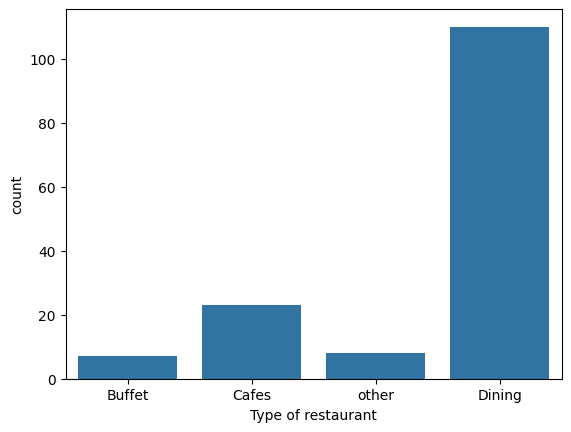

In [4]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Most of the restaurants fall in dining category.

Text(0, 0.5, 'Votes')

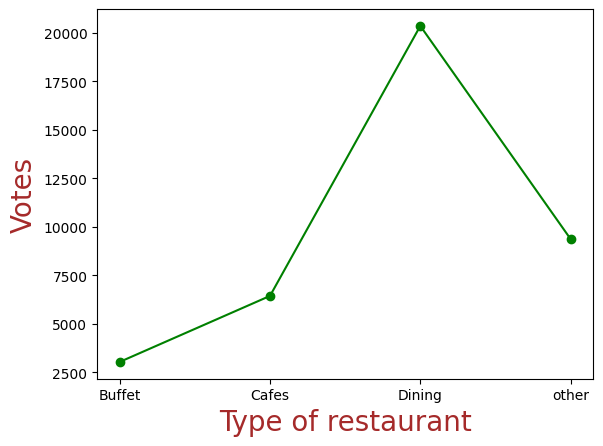

In [5]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="brown", size=20)
plt.ylabel("Votes", c="brown", size=20)

More individuals prefer dining restaurants.

In [6]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

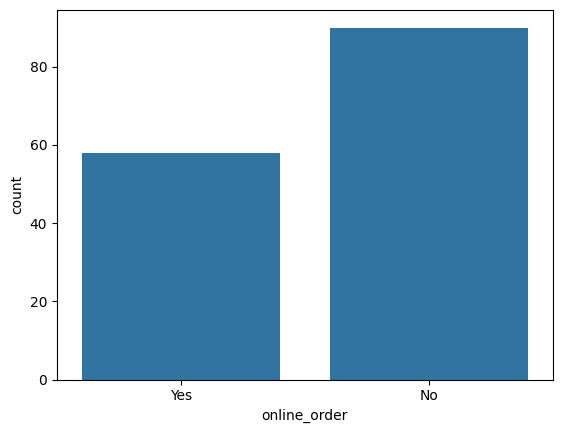

In [7]:
sns.countplot(x=dataframe['online_order'])

According to the data most of the restaurants do not accept online orders.

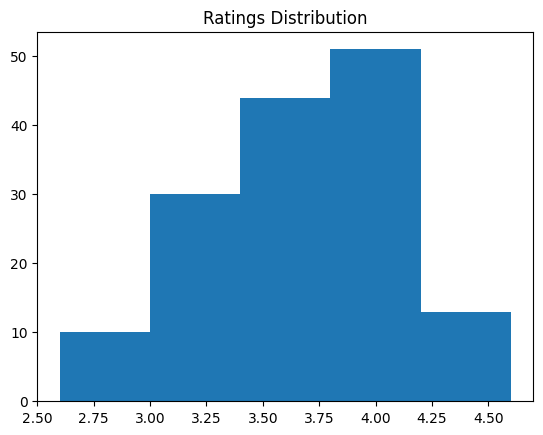

In [8]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

Most of the restaurants lie in the range of 3.5 to 4 rating.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

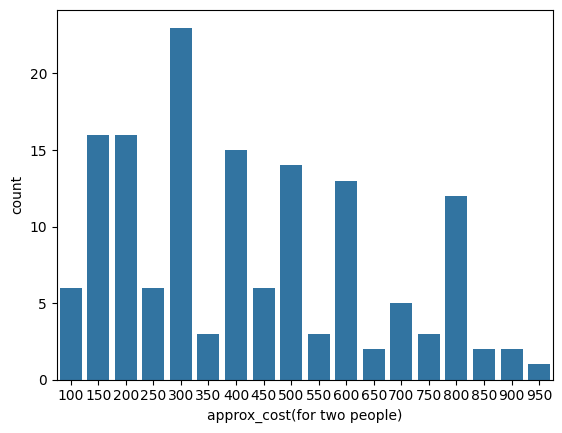

In [9]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Most of the couples prefer to go to restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

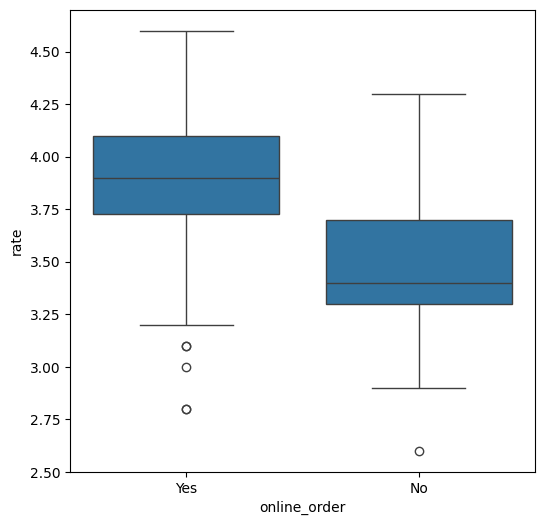

In [10]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Online orders recieved better ratings as compared to offline orders.

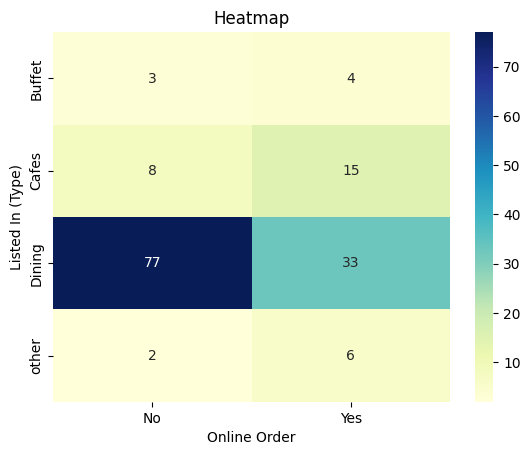

In [11]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

The plot suggests that dining restaurants have less online orders as compared to cafes. This means that customers prefer offline order dining restaurants and prefer to order online from cafes.